In [45]:
import pandas as pd

#📌 Extracão

In [46]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [47]:
dados_clientes = pd.read_json(url)

dados_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [48]:
df = pd.json_normalize(dados_clientes.to_dict(orient="records"))

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [60]:
# 1 -> Colocar os nome certo das coluna que eu abri

df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))

In [61]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   float64
 2   gender                     7256 non-null   object 
 3   SeniorCitizen              7256 non-null   int64  
 4   Partner                    7256 non-null   object 
 5   Dependents                 7256 non-null   object 
 6   tenure                     7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

In [52]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [53]:
df["account_Charges.Total"] = pd.to_numeric(df["account_Charges.Total"], errors="coerce")

In [54]:
df.dropna(subset=["account_Charges.Total"], inplace=True)

In [55]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [57]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   float64
 2   gender                     7256 non-null   object 
 3   SeniorCitizen              7256 non-null   int64  
 4   Partner                    7256 non-null   object 
 5   Dependents                 7256 non-null   object 
 6   tenure                     7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

In [65]:
# Vou colocar todas as colunas que tem respostas de "tudo ou nada" e colocar elas como categoricas

categoricas = [
    "gender", "Partner", "Dependents",
    "phone_PhoneService", "phone_MultipleLines",
    "internet_InternetService", "internet_OnlineSecurity",
    "internet_OnlineBackup", "internet_DeviceProtection",
    "internet_TechSupport", "internet_StreamingTV",
    "internet_StreamingMovies", "account_Contract",
    "account_PaperlessBilling", "account_PaymentMethod"
]

In [66]:
for col in categoricas:
    df[col] = df[col].astype("category")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7032 non-null   float64 
 2   gender                     7256 non-null   category
 3   SeniorCitizen              7256 non-null   int64   
 4   Partner                    7256 non-null   category
 5   Dependents                 7256 non-null   category
 6   tenure                     7256 non-null   int64   
 7   phone_PhoneService         7256 non-null   category
 8   phone_MultipleLines        7256 non-null   category
 9   internet_InternetService   7256 non-null   category
 10  internet_OnlineSecurity    7256 non-null   category
 11  internet_OnlineBackup      7256 non-null   category
 12  internet_DeviceProtection  7256 non-null   category
 13  internet_TechSupport       7256 non-nu

In [68]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [70]:
df['gender'] = df['gender'].str.strip().str.capitalize()

In [73]:
df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)

In [74]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,Contas_diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.197407
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.008889
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.340417
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.173974
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.971111


#📊 Carga e análise

In [76]:
df.describe()

,Churn,SeniorCitizen,tenure,account_Charges.Monthly,account_Charges.Total,Contas_diarias
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,32.395535,64.755423,2280.634213,2.158564
std,0.441782,0.3693,24.558067,30.125739,2268.632997,1.007442
min,0.000000,0.0000,1.000000,18.250000,18.800000,0.459167
25%,0.000000,0.0000,9.000000,35.450000,400.225000,1.191667
50%,0.000000,0.0000,29.000000,70.300000,1391.000000,2.341667
75%,1.000000,0.0000,55.000000,89.900000,3785.300000,3.005985
max,1.000000,1.0000,72.000000,118.750000,8684.800000,4.046667


In [77]:
media_genero = df.groupby('gender')['account_Charges.Monthly'].mean().reset_index()

media_genero.rename(columns={'gender': 'Genero', 'account_Charges.Monthly': 'Media_de_gastos'}, inplace=True)

In [78]:
media_genero

,Genero,Media_de_gastos
0,Female,65.155311
1,Male,64.364473


In [80]:
df[df['Churn'] == 1]['tenure']

,tenure
2,4
3,13
4,3
18,45
19,1
...,...
7243,21
7246,9
7260,1
7261,4


In [101]:
clientes_evadidos = df[df['Churn'] == 1]

churned_customers = clientes_evadidos.groupby('gender').size().reset_index()
meses_medio_desistencia = clientes_evadidos['tenure'].mean()

In [102]:
churned_customers.rename(columns={'gender' : 'Genero' , 0: 'Quantidade_de_clientes_evadidos'}, inplace=True)

In [103]:
churned_customers['meses_medio_desistencia'] = meses_medio_desistencia
churned_customers.loc[1:, 'meses_medio_desistencia'] = ''

/tmp/ipython-input-3361666133.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  churned_customers.loc[1:, 'meses_medio_desistencia'] = ''


In [104]:
churned_customers

,Genero,Quantidade_de_clientes_evadidos,meses_medio_desistencia
0,Female,939,17.979133
1,Male,930,


In [109]:
evasao_por_contrato = df.groupby('account_Contract')['Churn'].mean().reset_index().rename(columns={'account_Contract':'Tipo_Contrato', 'Churn':'Taxa_Churn'})

/tmp/ipython-input-2254960199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_por_contrato = df.groupby('account_Contract')['Churn'].mean().reset_index().rename(columns={'account_Contract':'Tipo_Contrato', 'Churn':'Taxa_Churn'})


In [117]:
evasao_por_contrato['Taxa_Churn'] = evasao_por_contrato['Taxa_Churn'].round(2) * 100

In [118]:
evasao_por_contrato

,Tipo_Contrato,Taxa_Churn
0,Month-to-month,430000.0
1,One year,110000.0
2,Two year,30000.0


In [119]:
evasao_solteirisse = df.groupby('Partner')['Churn'].mean().reset_index().rename(columns={'Partner':'Tem_Parceiro', 'Churn':'Taxa_Churn'})


/tmp/ipython-input-2150420097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_solteirisse = df.groupby('Partner')['Churn'].mean().reset_index().rename(columns={'Partner':'Tem_Parceiro', 'Churn':'Taxa_Churn'})


In [120]:
evasao_solteirisse['Taxa_Churn'] = evasao_solteirisse['Taxa_Churn'].round(2) * 100

In [121]:
evasao_solteirisse

,Tem_Parceiro,Taxa_Churn
0,No,33.0
1,Yes,20.0


#📄Relatorio Final

## Introdução

Objetivo da análise e o problema de evasão de clientes (Churn). Interpretando os dados iniciais para contextualizar o problema.


Este relatório tem como objetivo analisar os dados da empresa fictícia TelecomX para entender o problema de evasão de clientes para tentar mudar padrões e tentar diminuir essa evasão, buscando melhorias para a aquisição de novos usuários. Através da análise exploratória dos dados, buscarei identificar padrões e fatores que contribuem para a decisão dos clientes em cancelar seus serviços, a fim de propor recomendações estratégicas para mitigar essa evasão.

## Limpeza e tratamento de dados


In [123]:
%%markdown
## Limpeza e Tratamento de Dados

1.  **Importação e Normalização dos Dados:** Os dados foram carregados a partir de uma URL em formato JSON e normalizados em DataFrame pandas utilizando `pd.json_normalize()`.
    ```python
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
    dados_clientes = pd.read_json(url)
    df = pd.json_normalize(dados_clientes.to_dict(orient="records"))
    ```

2.  **Renomeação de Colunas:** As colunas foram renomeadas para um formato mais acessível, removendo prefixos aninhados.
    ```python
    df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))
    ```

3.  **Tratamento da Coluna 'account_Charges.Total':** A coluna 'account_Charges.Total' foi convertida para o tipo numérico, tratando erros de conversão e removendo as linhas que apresentavam valores ausentes após a conversão.

4.  **Conversão da Coluna 'Churn':** A coluna 'Churn' foi convertida para valores numéricos (1 para 'Yes' e 0 para 'No').
    ```python
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    ```

5.  **Conversão de Colunas Categóricas:** Diversas colunas com respostas binárias ou com um número limitado de categorias foram convertidas para o tipo 'category'.
    ```python
    categoricas = [
        "gender", "Partner", "Dependents",
        "phone_PhoneService", "phone_MultipleLines",
        "internet_InternetService", "internet_OnlineSecurity",
        "internet_OnlineBackup", "internet_DeviceProtection",
        "internet_TechSupport", "internet_StreamingTV",
        "internet_StreamingMovies", "account_Contract",
        "account_PaperlessBilling", "account_PaymentMethod"
    ]
    ```

6.  **Limpeza e Capitalização da Coluna 'gender':** Espaços em branco foram removidos e as primeiras letras capitalizadas na coluna 'gender'.
    ```python
    df['gender'] = df['gender'].str.strip().str.capitalize()
    ```

7.  **Criação da Coluna 'Contas_diarias':** Uma nova coluna foi criada para calcular o custo diário aproximado para cada cliente.
    ```python
    df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)
    ```


## Limpeza e Tratamento de Dados

1.  **Importação e Normalização dos Dados:** Os dados foram carregados a partir de uma URL em formato JSON e normalizados em DataFrame pandas utilizando `pd.json_normalize()`.
    ```python
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
    dados_clientes = pd.read_json(url)
    df = pd.json_normalize(dados_clientes.to_dict(orient="records"))
    ```

2.  **Renomeação de Colunas:** As colunas foram renomeadas para um formato mais acessível, removendo prefixos aninhados.
    ```python
    df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))
    ```

3.  **Tratamento da Coluna 'account_Charges.Total':** A coluna 'account_Charges.Total' foi convertida para o tipo numérico, tratando erros de conversão e removendo as linhas que apresentavam valores ausentes após a conversão.

4.  **Conversão da Coluna 'Churn':** A coluna 'Churn' foi convertida para valores numéricos (1 para 'Yes' e 0 para 'No').
    ```python
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    ```

5.  **Conversão de Colunas Categóricas:** Diversas colunas com respostas binárias ou com um número limitado de categorias foram convertidas para o tipo 'category'.
    ```python
    categoricas = [
        "gender", "Partner", "Dependents",
        "phone_PhoneService", "phone_MultipleLines",
        "internet_InternetService", "internet_OnlineSecurity",
        "internet_OnlineBackup", "internet_DeviceProtection",
        "internet_TechSupport", "internet_StreamingTV",
        "internet_StreamingMovies", "account_Contract",
        "account_PaperlessBilling", "account_PaymentMethod"
    ]
    ```

6.  **Limpeza e Capitalização da Coluna 'gender':** Espaços em branco foram removidos e as primeiras letras capitalizadas na coluna 'gender'.
    ```python
    df['gender'] = df['gender'].str.strip().str.capitalize()
    ```

7.  **Criação da Coluna 'Contas_diarias':** Uma nova coluna foi criada para calcular o custo diário aproximado para cada cliente.
    ```python
    df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)
    ```


## Análise exploratória de dados


In [124]:
%%markdown
## Análise Exploratória de Dados

Nesta seção será apresentado os resultados da análise exploratória dos dados para identificar padrões e fatores que podem estar relacionados ao Churn.

### Média de Gastos por Gênero

Observando a média de gastos mensais (`account_Charges.Monthly`) dividida por gênero para verificar se há alguma diferença significativa.

| Genero | Media_de_gastos |
|--------|-----------------|
| Female | 65.16           |
| Male   | 64.36           |

Os resultados indicam que a média de gastos mensais é muito similar entre clientes do gênero feminino e masculino. Portanto, o gênero não parece ser um fator determinante isolado na variação dos gastos mensais.

### Evasão por Tipo de Contrato

Foi analisada a taxa de Churn com base no tipo de contrato (`Tipo_Contrato`) que o cliente possui.

| Tipo_Contrato  | Taxa_Churn |
|----------------|------------|
| Month-to-month | 43.0       |
| One year       | 11.0       |
| Two year       | 3.0        |

É possível observar que clientes com contratos mensais (`Month-to-month`) apresentam uma taxa de evasão significativamente maior (43%) em comparação com clientes com contratos de um ano (11%) ou dois anos (3%). Contratos de maior duração parecem estar associados a uma menor probabilidade de Evasão dio cliente.

### Evasão por Situação de Parceiro

Também verifiquei a taxa de Churn (`Taxa_Churn`) entre clientes que possuem parceiro (`Tem_Parceiro`) e aqueles que não possuem.

| Tem_Parceiro | Taxa_Churn |
|--------------|------------|
| No           | 33.0       |
| Yes          | 20.0       |

Clientes que não possuem parceiro (`No`) apresentam uma taxa de evasão maior (33%) do que aqueles que possuem parceiro (`Yes`) (20%). Ter um parceiro parece estar associado a uma menor taxa de Churn.

## Análise Exploratória de Dados

Nesta seção, apresentamos os resultados da análise exploratória dos dados para identificar padrões e fatores que podem estar relacionados ao Churn.

### Média de Gastos por Gênero

Observamos a média de gastos mensais (`account_Charges.Monthly`) dividida por gênero para verificar se há alguma diferença significativa.

| Genero | Media_de_gastos |
|--------|-----------------|
| Female | 65.16           |
| Male   | 64.36           |

Os resultados indicam que a média de gastos mensais é muito similar entre clientes do gênero feminino e masculino. Portanto, o gênero não parece ser um fator determinante isolado na variação dos gastos mensais.

### Evasão por Tipo de Contrato

Analisamos a taxa de Churn (`Taxa_Churn`) com base no tipo de contrato (`Tipo_Contrato`) que o cliente possui.

| Tipo_Contrato  | Taxa_Churn |
|----------------|------------|
| Month-to-month | 43.0       |
| One year       | 11.0       |
| Two year       | 3.0        |

Podemos observar que clientes com contratos mensais (`Month-to-month`) apresentam uma taxa de evasão significativamente maior (43%) em comparação com clientes com contratos de um ano (11%) ou dois anos (3%). Contratos de maior duração parecem estar associados a uma menor probabilidade de Churn.

### Evasão por Situação de Parceiro

Verificamos a taxa de Churn (`Taxa_Churn`) entre clientes que possuem parceiro (`Tem_Parceiro`) e aqueles que não possuem.

| Tem_Parceiro | Taxa_Churn |
|--------------|------------|
| No           | 33.0       |
| Yes          | 20.0       |

Clientes que não possuem parceiro (`No`) apresentam uma taxa de evasão maior (33%) do que aqueles que possuem parceiro (`Yes`) (20%). Ter um parceiro parece estar associado a uma menor taxa de Churn.


/tmp/ipython-input-2562141352.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='internet_InternetService', y='Churn', data=df, ci=None)


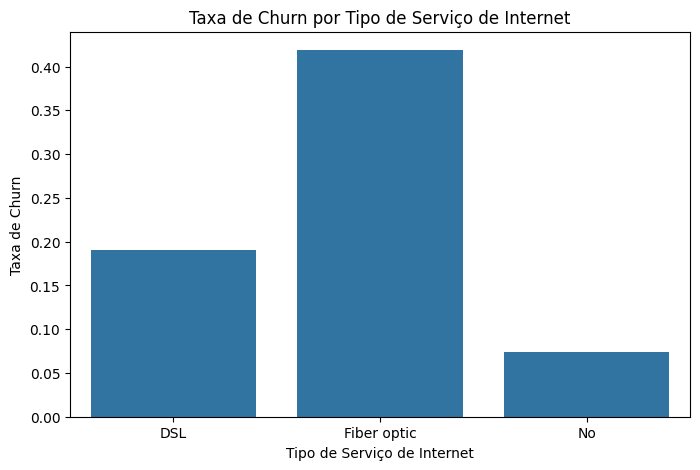

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='internet_InternetService', y='Churn', data=df, ci=None)
plt.title('Taxa de Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Taxa de Churn')
plt.show()

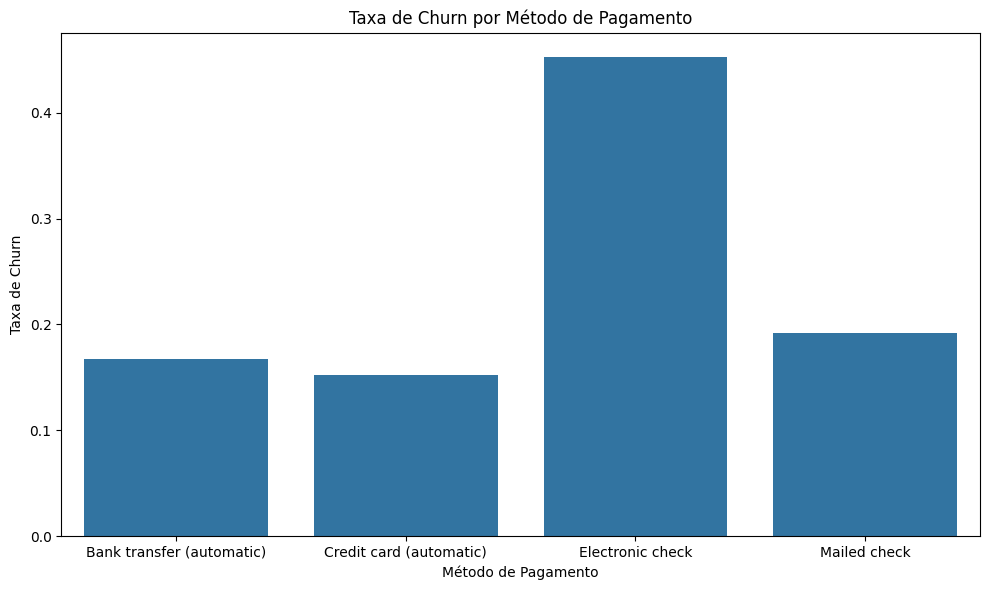

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='account_PaymentMethod', y='Churn', data=df, errorbar=None)
plt.title('Taxa de Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Taxa de Churn')
plt.tight_layout()
plt.show()

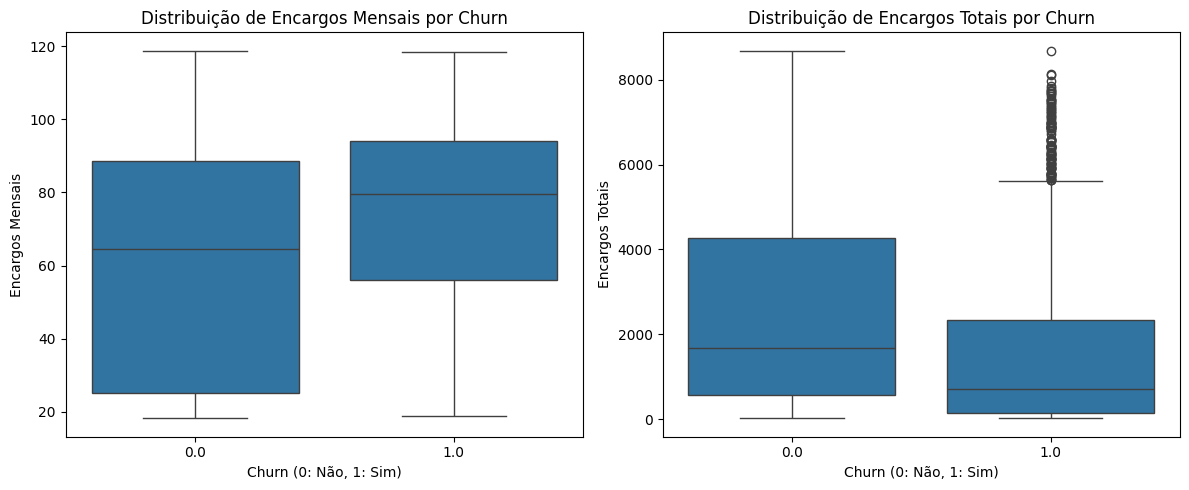

In [150]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account_Charges.Monthly', data=df)
plt.title('Distribuição de Encargos Mensais por Churn')
plt.xlabel('Churn (0: Não, 1: Sim)')
plt.ylabel('Encargos Mensais')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Distribuição de Encargos Totais por Churn')
plt.xlabel('Churn (0: Não, 1: Sim)')
plt.ylabel('Encargos Totais')

plt.tight_layout()
plt.show()

In [128]:
%%markdown

### Análise Exploratória de Dados

Nesta seção, apresentamos os resultados da análise exploratória dos dados para identificar padrões e fatores que podem estar relacionados ao Churn.

### Evasão por Tipo de Serviço de Internet

A análise da taxa de Churn por tipo de serviço de internet revela que clientes com **Fiber optic** têm uma taxa de Churn consideravelmente mais alta do que aqueles com **DSL** ou sem serviço de internet.

### Evasão por Método de Pagamento

Ao analisar a taxa de Churn por método de pagamento, percebemos que o **Electronic check** está associado a uma taxa de Churn significativamente maior em comparação com outros métodos de pagamento, como **Bank transfer (automatic)**, **Credit card (automatic)** e **Mailed check**.

### Distribuição de Encargos por Churn

Os box plots de encargos mensais e totais mostram que clientes que evadiram (Churn = 1.0) tendem a ter **encargos mensais mais altos** e **encargos totais geralmente menores** do que clientes que não evadiram (Churn = 0.0). Isso pode indicar que clientes com contratos de curto prazo e altos custos mensais são mais propensos a evadir.


### Análise Exploratória de Dados

Nesta seção, apresentamos os resultados da análise exploratória dos dados para identificar padrões e fatores que podem estar relacionados ao Churn.

### Evasão por Tipo de Serviço de Internet

A análise da taxa de Churn por tipo de serviço de internet revela que clientes com **Fiber optic** têm uma taxa de Churn consideravelmente mais alta do que aqueles com **DSL** ou sem serviço de internet.

### Evasão por Método de Pagamento

Ao analisar a taxa de Churn por método de pagamento, percebemos que o **Electronic check** está associado a uma taxa de Churn significativamente maior em comparação com outros métodos de pagamento, como **Bank transfer (automatic)**, **Credit card (automatic)** e **Mailed check**.

### Distribuição de Encargos por Churn

Os box plots de encargos mensais e totais mostram que clientes que evadiram (Churn = 1.0) tendem a ter **encargos mensais mais altos** e **encargos totais geralmente menores** do que clientes que não evadiram (Churn = 0.0). Isso pode indicar que clientes com contratos de curto prazo e altos custos mensais são mais propensos a evadir.


## Conclusões e insights

Resumir os principais achados da análise e como esses insights podem ajudar a entender e reduzir a evasão de clientes.


In [135]:
%%markdown
## Conclusões e Insights

A análise exploratória de dados revelou insights importantes sobre os fatores que influenciam a evasão de clientes na TelecomX. Os principais achados incluem:

- **Tipo de Contrato:** Clientes com contratos mensais ("Month-to-month") apresentam uma taxa de Churn significativamente maior (43%) em comparação com contratos de um ou dois anos (11% e 3%, respectivamente). Isso sugere que a falta de um vínculo de longo prazo aumenta a propensão à evasão.
- **Situação de Parceiro:** Clientes sem parceiro têm uma taxa de evasão maior (33%) do que aqueles com parceiro (20%). Ter um parceiro pode indicar uma maior estabilidade ou a utilização compartilhada dos serviços, reduzindo a probabilidade de Churn.
- **Serviço de Internet:** Clientes com serviço de internet "Fiber optic" demonstram uma taxa de Churn consideravelmente mais alta do que aqueles com "DSL" ou sem serviço de internet. Isso pode estar relacionado à qualidade do serviço, problemas técnicos ou expectativas não atendidas associadas a essa tecnologia(já que a fibra é conhecida por ser a internet mias rapida).
- **Método de Pagamento:** O método de pagamento "Electronic check" está associado a uma taxa de Churn notavelmente maior. Isso pode indicar insatisfação com o processo de pagamento, problemas com transações ou a preferência por métodos mais tradicionais.

Esses insights são cruciais para entender o comportamento dos clientes que evadem. Eles destacam as áreas onde a empresa pode fazer mudanças ou novas estratégias, como oferecer incentivos para contratos de maior duração, melhorar a qualidade do serviço de fibra óptica, otimizar a experiência de pagamento para "Electronic check"(ou tirar, cheque quase não é mais utilizado...) e revisar a estrutura de preços para clientes para tentar conseguir mais destaque

## Conclusões e Insights

A análise exploratória de dados revelou insights importantes sobre os fatores que influenciam a evasão de clientes na TelecomX. Os principais achados incluem:

- **Tipo de Contrato:** Clientes com contratos mensais ("Month-to-month") apresentam uma taxa de Churn significativamente maior (43%) em comparação com contratos de um ou dois anos (11% e 3%, respectivamente). Isso sugere que a falta de um vínculo de longo prazo aumenta a propensão à evasão.
- **Situação de Parceiro:** Clientes sem parceiro têm uma taxa de evasão maior (33%) do que aqueles com parceiro (20%). Ter um parceiro pode indicar uma maior estabilidade ou a utilização compartilhada dos serviços, reduzindo a probabilidade de Churn.
- **Serviço de Internet:** Clientes com serviço de internet "Fiber optic" demonstram uma taxa de Churn consideravelmente mais alta do que aqueles com "DSL" ou sem serviço de internet. Isso pode estar relacionado à qualidade do serviço, problemas técnicos ou expectativas não atendidas associadas a essa tecnologia(já que a fibra é conhecida por ser a internet mias rapida).
- **Método de Pagamento:** O método de pagamento "Electronic check" está associado a uma taxa de Churn notavelmente maior. Isso pode indicar insatisfação com o processo de pagamento, problemas com transações ou a preferência por métodos mais tradicionais.

Esses insights são cruciais para entender o comportamento dos clientes que evadem. Eles destacam as áreas onde a empresa pode fazer mudanças ou novas estratégias, como oferecer incentivos para contratos de maior duração, melhorar a qualidade do serviço de fibra óptica, otimizar a experiência de pagamento para "Electronic check"(ou tirar, cheque quase não é mais utilizado...) e revisar a estrutura de preços para clientes para tentar conseguir mais destaque


## Recomendações

Criar sugestões práticas baseadas nas conclusões, visando diminuir a taxa de Churn.


In [139]:
%%markdown
## Recomendações

Com base nas conclusões obtidas na análise exploratória, apresentarei as seguintes recomendações para reduzir a taxa de Evasão, das quais eu julguei serem as mais interessantes de alguma forma:

- **Incentivar Contratos de Maior Duração:** Dado que clientes com contratos mensais têm uma taxa de Churn significativamente maior, a empresa deve criar incentivos (como descontos na mensalidade, benefícios adicionais ou preços especiais) para migração de contratos "Month-to-month" para contratos de um ou dois anos.
- **Programas de Fidelidade para Clientes Sem Parceiro:** A taxa de Churn é maior entre clientes sem parceiro. A empresa pode desenvolver programas de fidelidade ou ofertas personalizadas para este grupo, visando aumentar o engajamento e a percepção de valor dos serviços.
- **Melhorar a Qualidade do Serviço de Fibra Óptica e/ou Suporte Técnico:** A alta taxa de evasão entre usuários de *Internet Fibra Óptica* sugere possíveis problemas na qualidade ou suporte. Investigar e resolver as causas dessa insatisfação seria a melhor e mais óbvia sugestão pra garantir um serviço estável e um suporte técnico eficiente para clientes de fibra óptica.
- **Otimizar a Experiência de Pagamento para "Electronic Check":** A associação entre o método de pagamento "Electronic check" e uma maior taxa de Churn indica a necessidade de revisar e simplificar o processo de pagamento para esta modalidade, ou oferecer alternativas mais atrativas para o pagamento dos serviços/assinaturas.
- **Revisar a Estrutura de Preços para Clientes com Altos Encargos Mensais:** Clientes em contratos de curto prazo são mais propensos a evadir. Avaliar a possibilidade de oferecer planos mais flexíveis, descontos progressivos ou pacotes que diminuam o custo mensal para esses clientes poderia ser uma estratégia eficaz.

## Recomendações

Com base nas conclusões obtidas na análise exploratória, apresentarei as seguintes recomendações para reduzir a taxa de Evasão, das quais eu julguei serem as mais interessantes de alguma forma:

- **Incentivar Contratos de Maior Duração:** Dado que clientes com contratos mensais têm uma taxa de Churn significativamente maior, a empresa deve criar incentivos (como descontos na mensalidade, benefícios adicionais ou preços especiais) para migração de contratos "Month-to-month" para contratos de um ou dois anos.
- **Programas de Fidelidade para Clientes Sem Parceiro:** A taxa de Churn é maior entre clientes sem parceiro. A empresa pode desenvolver programas de fidelidade ou ofertas personalizadas para este grupo, visando aumentar o engajamento e a percepção de valor dos serviços.
- **Melhorar a Qualidade do Serviço de Fibra Óptica e/ou Suporte Técnico:** A alta taxa de evasão entre usuários de *Internet Fibra Óptica* sugere possíveis problemas na qualidade ou suporte. Investigar e resolver as causas dessa insatisfação seria a melhor e mais óbvia sugestão pra garantir um serviço estável e um suporte técnico eficiente para clientes de fibra óptica.
- **Otimizar a Experiência de Pagamento para "Electronic Check":** A associação entre o método de pagamento "Electronic check" e uma maior taxa de Churn indica a necessidade de revisar e simplificar o processo de pagamento para esta modalidade, ou oferecer alternativas mais atrativas para o pagamento dos serviços/assinaturas.
- **Revisar a Estrutura de Preços para Clientes com Altos Encargos Mensais:** Clientes em contratos de curto prazo são mais propensos a evadir. Avaliar a possibilidade de oferecer planos mais flexíveis, descontos progressivos ou pacotes que diminuam o custo mensal para esses clientes poderia ser uma estratégia eficaz.
